## a notebook with analysis


$$
e^{i \pi}
$$

In [3]:
from __future__ import division, print_function
%load_ext autoreload
%autoreload 2

import numpy as np
np.set_printoptions(precision=6, suppress=True)
import os
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
phi = (np.sqrt(5)+1)/2
fig_width = 10
figsize = (fig_width, fig_width/phi)

In [35]:
x['gaze'][0], y['gaze']

(584.0, array([ 540.,  573.,  627., ...,  430.,  459.,  459.]))

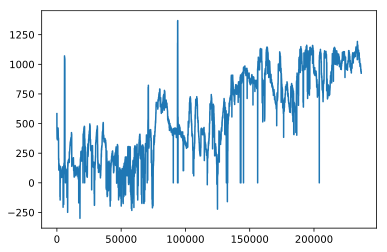

In [36]:
plt.plot(time['gaze']-time['gaze'][0], x['gaze'])

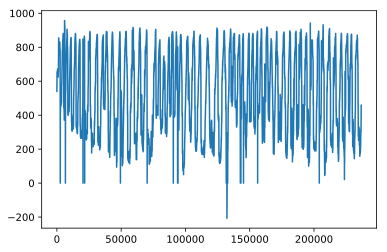

In [37]:
plt.plot(time['gaze']-time['gaze'][0], y['gaze'])

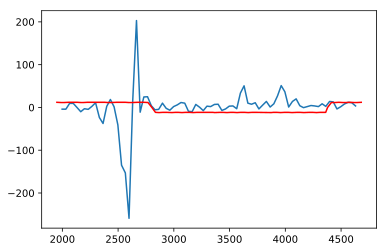

In [47]:
N_start, N_stop = 60, 140
plt.plot(time['gaze'][N_start:N_stop]-time['gaze'][0], np.gradient(y['gaze'])[N_start:N_stop])
N_start, N_stop = 55, 130
plt.plot(time['ball'][N_start:N_stop]-time['ball'][0], np.gradient(y['ball'])[N_start:N_stop], c='r')

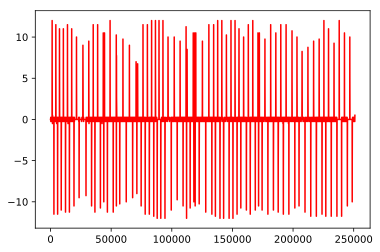

In [56]:

plt.plot(time['ball']-time['ball'][0], np.gradient(np.gradient(y['ball'])), c='r')

In [54]:
np.gradient(np.gradient(y['ball']))[N_start:N_stop] < -4


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

In [50]:
time['ball'][N_start:N_stop] [ np.gradient(np.gradient(y['ball']))[N_start:N_stop] < -2]


array([  1.497607e+12,   1.497607e+12,   1.497607e+12])

In [52]:
time_rebond = time['ball'][N_start:N_stop] [ np.gradient(np.gradient(y['ball']))[N_start:N_stop] > 2].mean()

print(time_rebond)

1.49760658166e+12


In [59]:
seuil = 4
down_rebound_times =  time['ball'] [ np.gradient(np.gradient(y['ball'])) < -seuil] - time['ball'][0]
up_rebound_times =  time['ball'] [ np.gradient(np.gradient(y['ball'])) > seuil] - time['ball'][0]


In [2]:
cd ..

C:\Users\Syht\Documents\Stage_LNC\Python\StochPong


In [4]:
import os
fig, ax = plt.subplots(figsize=(15,8))
time, x, y = {}, {}, {}
for obj, color in zip(['gaze', 'paddle', 'ball'], ['g', 'r', 'b']):
    fname = os.path.join(datadir, tag + '_' + obj + '_' + subject + '.txt')
    
    if obj=='gaze':
        time[obj], x[obj], y[obj] = np.loadtxt(fname, delimiter=';', usecols=(2, 5, 6), unpack=True)#)
        #time, x, y = data[0, :]
        #eT;dT;aT;Fix;State;Rwx;Rwy;Avx;Avy;LRwx;LRwy;LAvx;LAvy;LPSz;LCx;LCy;RRwx;RRwy;RAvx;RAvy;RPSz;RCx;RCy
        #En sachant que le Temps est aT (soit la 3ème colonne)
        #Et que les coordonnées X et Y sont Rwx et Rwy soit la 6ème et 7ème colonne si je ne dis pas de bêtise.
        print(time[obj], x[obj], y[obj])
        time[obj] *= 1000
        #print(x.min(), y.min(), x.max(), y.max())
    else:
        time[obj], x[obj], y[obj] = np.loadtxt(fname, delimiter=';', unpack=True)#, usecols=(0, 2))
    ax.plot(x[obj], 820 - y[obj], c=color)

[  1.49864985e+09   1.49864985e+09   1.49864985e+09 ...,   1.49865027e+09
   1.49865028e+09   1.49865028e+09] [ 586.  590.  577. ...,  442.  453.  454.] [ 864.  860.  863. ...,  -52.  -37.  -46.]


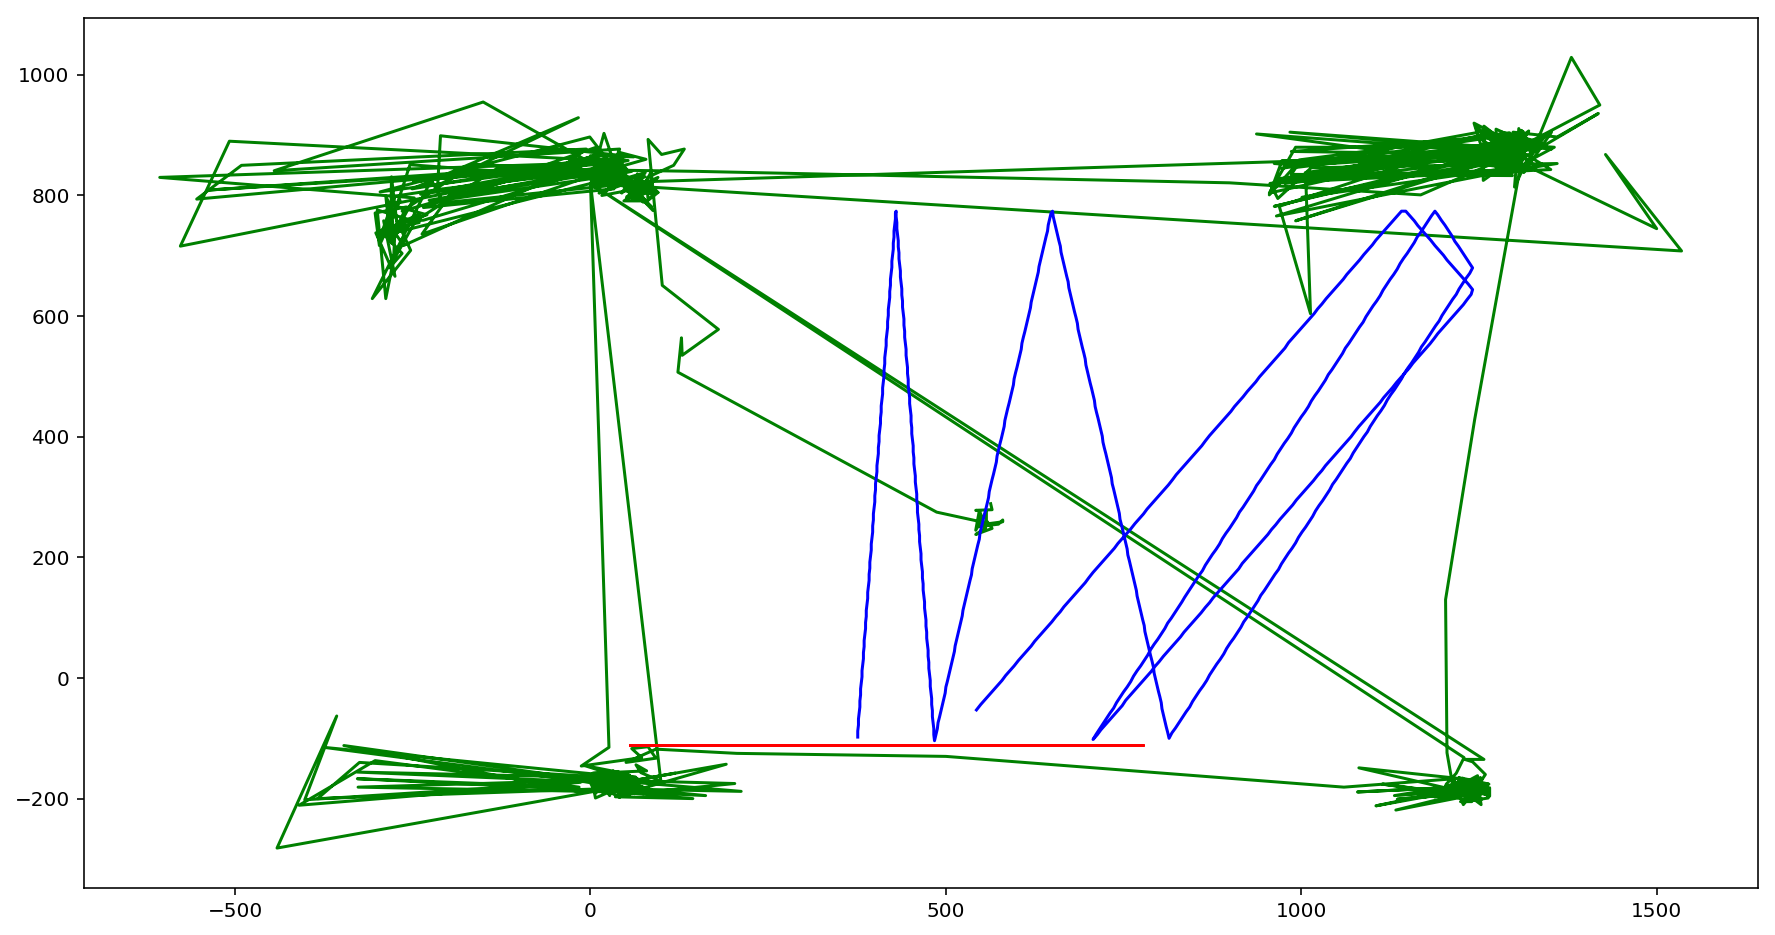

In [10]:
import os
fig, ax = plt.subplots(figsize=(15,8))
time, x, y = {}, {}, {}
for obj, color in zip(['gaze', 'paddle', 'ball'], ['g', 'r', 'b']):
    fname = os.path.join(datadir, tag + '_' + obj + '_' + subject + '.txt')
    
    if obj=='gaze':
        time[obj], x[obj], y[obj] = np.loadtxt(fname, delimiter=';', usecols=(2, 5, 6), unpack=True)#)
        #time, x, y = data[0, :]
        #eT;dT;aT;Fix;State;Rwx;Rwy;Avx;Avy;LRwx;LRwy;LAvx;LAvy;LPSz;LCx;LCy;RRwx;RRwy;RAvx;RAvy;RPSz;RCx;RCy
        #En sachant que le Temps est aT (soit la 3ème colonne)
        #Et que les coordonnées X et Y sont Rwx et Rwy soit la 6ème et 7ème colonne si je ne dis pas de bêtise.
        #print(time[obj], x[obj], y[obj])
        time[obj] *= 1000
        #print(x.min(), y.min(), x.max(), y.max())
    else:
        time[obj], x[obj], y[obj] = np.loadtxt(fname, delimiter=';', unpack=True)#, usecols=(0, 2))
    ax.plot(x[obj], 820 - y[obj], c=color)

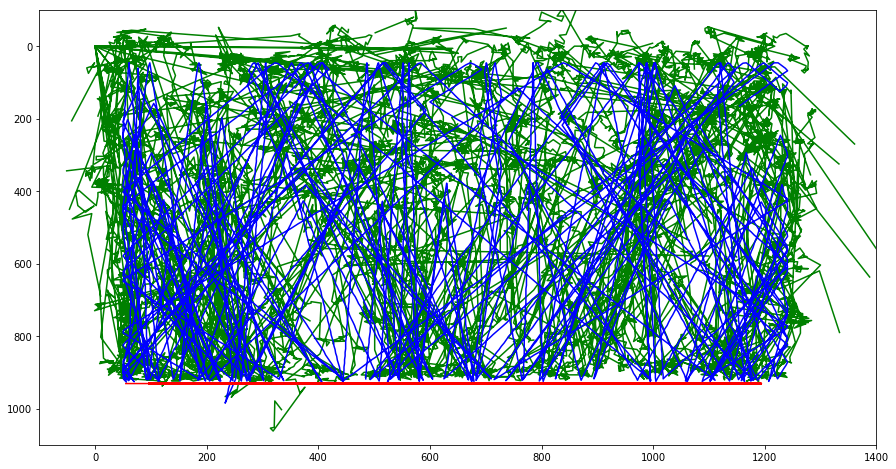

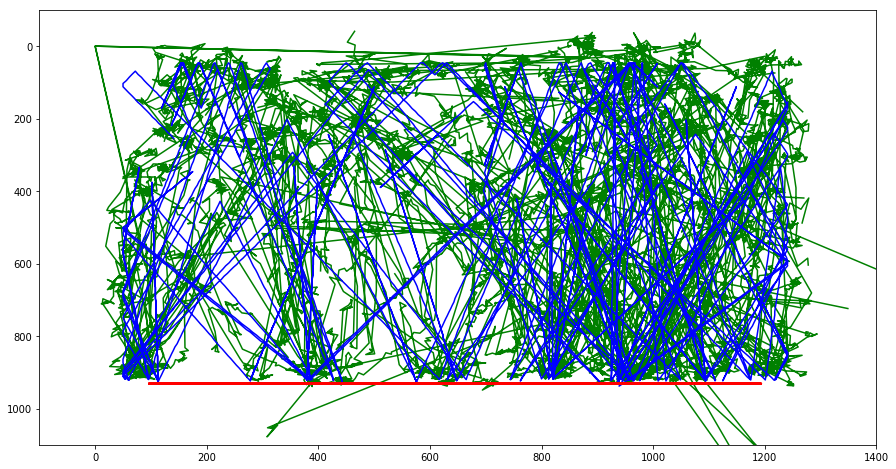

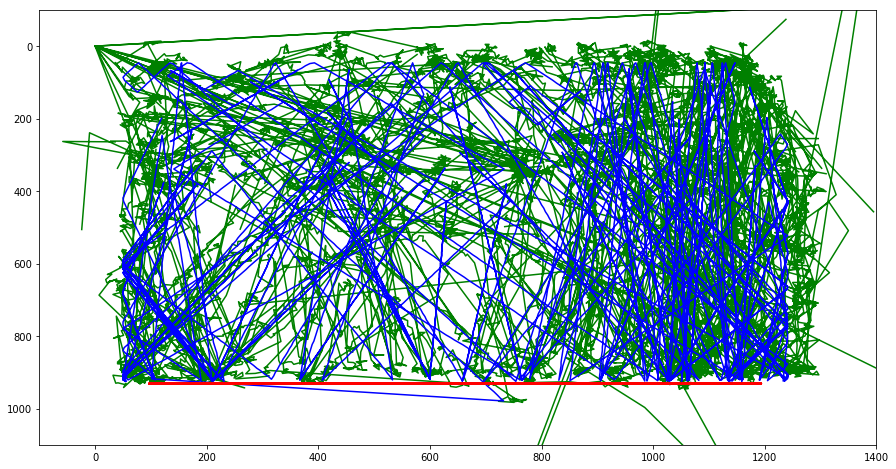

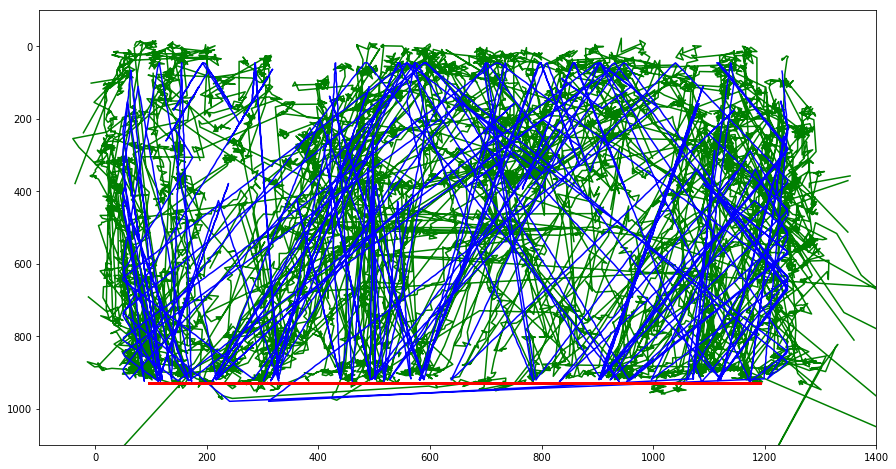

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [5]:
import os, matplotlib.pyplot as plt, numpy as np, pandas as pd

time, x, y = {}, {}, {}

datadir, tagg, subject = 'datadir', '2017-06-28_144217', 'juliette'
tags = ['2017-06-28_133727', '2017-06-28_134443', '2017-06-28_135020', '2017-06-28_135706', '2017-06-28_140322', '2017-06-28_141025']
fig = ['fig1', 'fig2', 'fig3', 'fig4', 'fig5', 'fig6']


i = 0
for tag in tags:
    fig[i], ax = plt.subplots(figsize=(15,8))
    df = pd.read_csv(os.path.join(datadir, 'pilot', tag + '_dataframe_lvl'+ str(i+1) + '_' + subject + '.csv'), '\t')

    for obj, color in zip(['gaze', 'ball', 'paddle'], ['g', 'b', 'r']):
        if obj == 'gaze':
            time[obj], x[obj], y[obj] = df.loc[:,'Tgaze'], df.loc[:,'Xgaze'], df.loc[:,'Ygaze']
        if obj == 'ball':
            time[obj], x[obj], y[obj] = df.loc[:,'Tball'], df.loc[:,'Xball'], df.loc[:,'Yball']
        if obj == 'paddle':
            time[obj], x[obj], y[obj] = df.loc[:,'Tpaddle'], df.loc[:,'Xpaddle'], df.loc[:,'Ypaddle']

        ax.set_xlim([-100,1400])
        ax.set_ylim([-100,1100])
        # invert the y-axis
        ax.set_ylim(ax.get_ylim()[::-1])
        ax.plot(x[obj], y[obj], c=color)
    i += 1

In [4]:
%matplotlib inline

In [3]:
import os, matplotlib.pyplot as plt, numpy as np, pandas as pd

#subjects = ['remi', 'valerie', 'jade', 'juliette', 'elisa', 'maxime']
subjects = ['juliette']
t, x, y, time, fig = {}, {}, {}, [], []
dfs = {}

for subj in subjects:
    i = 1
    for file in os.listdir(os.path.join('datadir', 'pilot')):
        if file.endswith(".csv"):
            if subj in file:
                dfs['df%s%s' %(subj, i)] = pd.read_csv(os.path.join('datadir', 'pilot', file), '\t')
                i += 1

# The dataframes are in the variables named : key = df<subject_name><level_number> and stored in a dict
j = 0
for key, df in dfs.items():
    fig.append(fig)
    fig[j], ax = plt.subplots(figsize=(15,8))
    for obj, color in zip(['gaze', 'ball', 'paddle'], ['g', 'b', 'r']):
        if obj == 'gaze':
            t[obj], x[obj], y[obj] = df.loc[:,'Tgaze'], df.loc[:,'Xgaze'], df.loc[:,'Ygaze']
        if obj == 'ball':
            t[obj], x[obj], y[obj] = df.loc[:,'Tball'], df.loc[:,'Xball'], df.loc[:,'Yball']
        if obj == 'paddle':
            t[obj], x[obj], y[obj] = df.loc[:,'Tpaddle'], df.loc[:,'Xpaddle'], df.loc[:,'Ypaddle']
    j += 1

    time.append(t['gaze'][len(t['gaze'])-1] - t['gaze'][0]) # retrieve the lengths of the levels

    """ Plots of: x = f(t) """
    """plt.plot(t['gaze']-t['gaze'][0], x['gaze'], 'g') # plot of time(Xgaze)
    plt.plot(t['paddle']-t['paddle'][0], x['ball'], 'b') # plot of time(Xball)
    plt.plot(t['paddle']-t['paddle'][0], x['paddle'], 'r') # plot of time(Xpaddle)
    plt.ylabel('X Position')
    plt.xlabel('Time (s)')"""

    """ Histograms """
    newXgaze = x['gaze'][~np.isnan(x['gaze'])]
    newXball = x['ball'][~np.isnan(x['ball'])]
    newXpaddle = x['paddle'][~np.isnan(x['paddle'])]
    plt.hist([newXgaze, newXball, newXpaddle], normed=True, color=['g', 'b', 'r'])
    plt.ylabel('Probability')
    plt.xlabel('Value')

    """ Gradients """
    """N_start, N_stop = 200, 350
    plt.plot(t['gaze'][N_start:N_stop]-t['gaze'][0], np.gradient(y['gaze'])[N_start:N_stop], 'g')
    plt.plot(t['gaze'][N_start:N_stop]-t['gaze'][0], np.gradient(y['ball'])[N_start:N_stop], 'b')"""

print(time)

[427.98899984359741, 345.1560001373291, 406.17399978637695, 374.33200001716614, 416.19899988174438, 406.04000020027161]
